In [1]:
#Import libraries and read CSV to drink dataframe
import pandas as pd
import numpy as np
import matplotlib as plt

drinks = pd.read_csv("starbucks_drinkMenu_expanded.csv")

In [2]:
#strip the extra space from both sides of column names to clean data
drinks.columns = drinks.columns.str.lstrip()
drinks.columns = drinks.columns.str.rstrip()

In [3]:
#Get unique categories and make a list 
Categories = drinks.Beverage_category.unique()

#function to print out the category names and get user selection. Returns the choice as int
def BV_Cat():
    i = 0
    for item in Categories:
        print(i, ". ", item)
        i = i+1
        
    Category = int(input("Please Select a Category: "))
    return (Category)



In [4]:
#Runs functions and assigns the return value (user category int) to variable Category
Category = BV_Cat()

#Create empty string and then assign it the string contained in Categories list item (Category)
Category_Name = ' '
Category_Name = Categories[Category]

#Print what the user chose
print("You chose: ", Category_Name)


0 .  Coffee
1 .  Classic Espresso Drinks
2 .  Signature Espresso Drinks
3 .  Tazo® Tea Drinks
4 .  Shaken Iced Beverages
5 .  Smoothies
6 .  Frappuccino® Blended Coffee
7 .  Frappuccino® Light Blended Coffee
8 .  Frappuccino® Blended Crème
Please Select a Category: 1
You chose:  Classic Espresso Drinks


In [5]:
#Create a list of specific beverages from Drinks where the Beverage Category is the user's choice using .loc
Beverages = drinks.loc[drinks['Beverage_category'] == Category_Name, 'Beverage']

#Get only the unique Beverages (to avoid duplicates)
Beverages = Beverages.unique()

#Function to print beverage names and get users choice as int and return value
def Beverage():
    i = 0
    for item in Beverages:
        print(i, ". ", item)
        i = i + 1
        
    Choice = int(input("Please Select a Beverage: "))
    return(Choice)

In [6]:
#Run function and save the return value to variable Choice
Choice = Beverage()

#Creaate empty string and assign it the string contained in Beverage list position (Choice)
Drink_Name = ' '
Drink_Name = Beverages[Choice]

#Print user choice
print("You chose: ", Drink_Name)

0 .  Caffè Latte
1 .  Caffè Mocha (Without Whipped Cream)
2 .  Vanilla Latte (Or Other Flavoured Latte)
3 .  Caffè Americano
4 .  Cappuccino
5 .  Espresso
6 .  Skinny Latte (Any Flavour)
Please Select a Beverage: 1
You chose:  Caffè Mocha (Without Whipped Cream)


In [7]:
#Create a list of specifications from Drinks where the Beverage Category and Beverage are users choice
Prep = drinks.loc[(drinks['Beverage_category'] == Category_Name) & (drinks['Beverage'] == Drink_Name), 'Beverage_prep']

#Get only unique values to avoid duplicates
Prep = Prep.unique()

#Function that prints the specifications available and gets users int, returns
def Specifications():
    i = 0
    for item in Prep:
        print(i, ". ", item)
        i = i + 1
        
    Changes = int(input("Select any changes: "))
    return(Changes)

In [8]:
#Runs function and assigns return to variable
Changes = Specifications()

#Create empty string and assign it the value in Prep list poisiton {Changes}
Change_Name = ' '
Change_Name = Prep[Changes]

#Print user choice
print("You chose: ", Change_Name)

0 .  Short Nonfat Milk
1 .  Short 2% Milk
2 .  Short Soymilk
3 .  Tall Nonfat Milk
4 .  Tall 2% Milk
5 .  Tall Soymilk
6 .  Grande Nonfat Milk
7 .  Grande 2% Milk
8 .  Grande Soymilk
9 .  Venti Nonfat Milk
10 .  Venti 2% Milk
11 .  Venti Soymilk
Select any changes: 0
You chose:  Short Nonfat Milk


In [9]:
#Creates a list of nutrient options from all column names. Removes those that aren't nutrients using .remove()
Nutrition = list(drinks)
Nutrition.remove('Beverage_category')
Nutrition.remove('Beverage')
Nutrition.remove('Beverage_prep')

['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)']


In [10]:
#Function to print nutrient options and get user choice int, returns
def Nutrition_Menu():
    i = 0
    for N in Nutrition:
        print(i, ". ", N)
        i = i+1
    
    Nutrient = int(input("Please choose which item you'd like to know about: "))
    
    
    return(Nutrient)


In [11]:
#Runs function and assigns return value to variable
Nutrient = Nutrition_Menu()    

#Create empty string and assign it the value in Nutrition list poisiton {Nutrient}
Nutrient_Name = ' '
Nutrient_Name = Nutrition[Nutrient]

#Prints user choice
print("You chose: ", Nutrient_Name)


0 .  Calories
1 .  Total Fat (g)
2 .  Trans Fat (g)
3 .  Saturated Fat (g)
4 .  Sodium (mg)
5 .  Total Carbohydrates (g)
6 .  Cholesterol (mg)
7 .  Dietary Fibre (g)
8 .  Sugars (g)
9 .  Protein (g)
10 .  Vitamin A (% DV)
11 .  Vitamin C (% DV)
12 .  Calcium (% DV)
13 .  Iron (% DV)
14 .  Caffeine (mg)
Please choose which item you'd like to know about: 0
You chose:  Calories


In [12]:
#Gets the value from the cell meeting all previous criteria
Nutrient_Info = drinks.loc[(drinks['Beverage'] == Drink_Name) & (drinks['Beverage_prep'] == Change_Name)][Nutrient_Name]

#Convert to int to get only the needed value
Nutrient_Info = int(Nutrient_Info)

#Print out what the user chose and the wanted information for that drink
print("Your drink is: ", Drink_Name)
print("Your specifications are: ", Change_Name)
print("This has: ", Nutrient_Info, Nutrient_Name)

Your drink is:  Caffè Mocha (Without Whipped Cream)
Your specifications are:  Short Nonfat Milk
This has:  110 Calories


<AxesSubplot:title={'center':'Calories'}, ylabel='Beverage'>

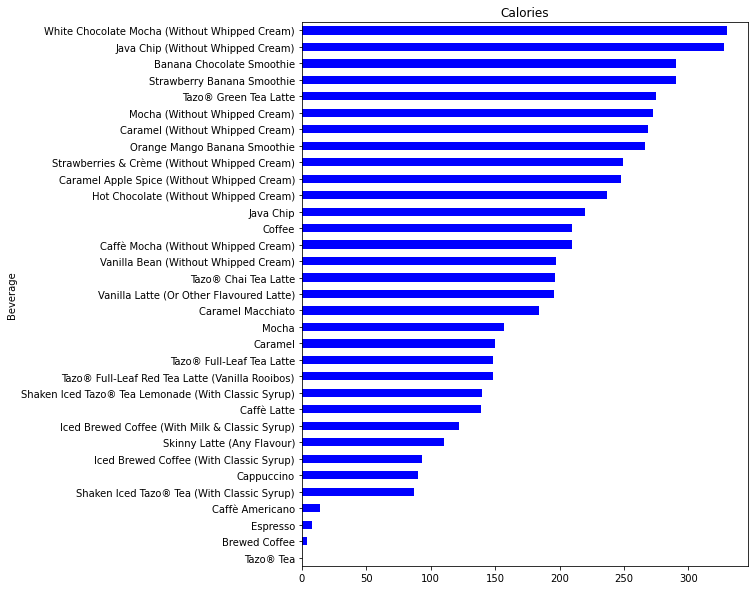

In [13]:
#Graph of the mean calories in each drink from most to least for user information
drinks.groupby('Beverage')['Calories'].mean().sort_values(ascending=True).plot(kind='barh', color='blue', title='Calories', figsize=(8,10))

<AxesSubplot:title={'center':'Carbs'}, xlabel='Beverage_category'>

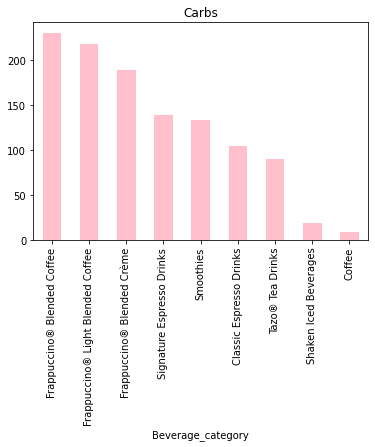

In [14]:
#Graph of mean carbs in each category from most to least for user information
drinks.groupby('Beverage_category')['Total Carbohydrates (g)'].mean().sort_values(ascending=False).plot(kind='bar', color = 'pink', title="Carbs")

<AxesSubplot:title={'center':'Sugars'}, ylabel='Beverage'>

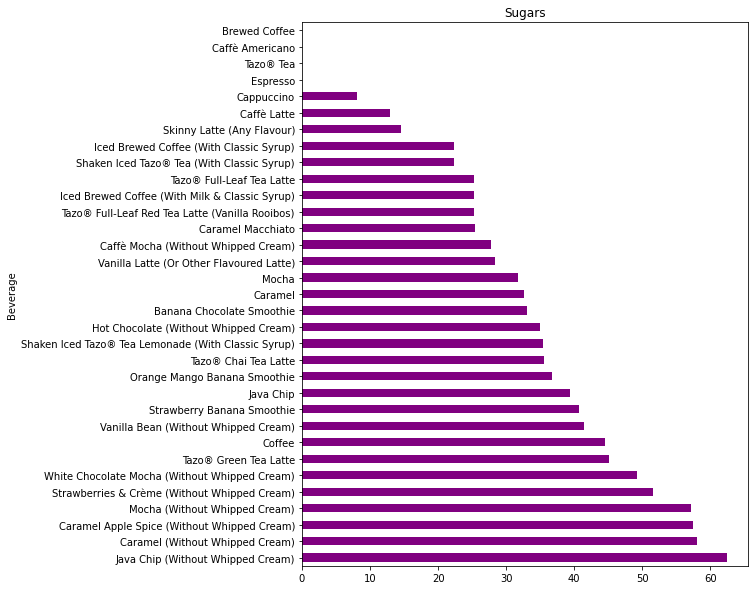

In [15]:
#Graph of mean Sugar in each beverage from most to least for user information
drinks.groupby('Beverage')['Sugars (g)'].mean().sort_values(ascending=False).plot(kind='barh',color='purple', title='Sugars', figsize=(8,10))